In [137]:
import pandas as pd
print(f'pandas: {pd.__version__}')
import numpy as np
print(f'numpy: {np.__version__}')
# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Making my visualizations pretty
sns.set_style('whitegrid')
# Combination exploration
import itertools
import yaml

# Loading my inbound data back in
processed_inbound = pd.read_pickle('objects/processed_inbound.pkl')
print(f'\nprocessed inbound:\n{processed_inbound.head()}')

# Loading back inbound data
inbound = pd.read_pickle('objects/inbound.pkl')
print(f'\ninbound:\n{inbound.head()}')

pandas: 1.0.5
numpy: 1.18.5

processed inbound:
0     [new, update, i️, make, sure, download, yester...
4     [hey, anyone, else, upgraded, io, issue, capit...
9     [hello, internet, someone, explain, symbol, ke...
10    [get, screenshot, say, iphonex, reserve, email...
12    [thank, update, phone, even, slow, barely, wor...
dtype: object

inbound:
0    @AppleSupport The newest update. I️ made sure ...
1               @AppleSupport  https://t.co/NV0yucs0lB
2    @AppleSupport Tried resetting my settings .. r...
3    @AppleSupport This is what it looks like https...
4    @AppleSupport I️ have an iPhone 7 Plus and yes...
Name: inbound_text, dtype: string


# My Approach: Heuristic Intent Distribution Exploration
I need to get an idea of how much true intents are inside my Twitter data. Doing it by keyword might prove to be a good baseline way to do this. I build off this idea, and do a heuristic clustering of my intents by trying to minimize intent intersections. This is my way of getting my training data for intent classificaition.

## Brief Keyword Search EDA
Using this as a tool to look at Tweets.

In [182]:
# Search by keywords (single keyword filter)
keyword = 'mac'

# Seeing what the processed Tweets look like
filt = [i for i in processed_inbound if keyword in i]
filt

[['help',
  'mac',
  'app',
  'store',
  'open',
  'can',
  'not',
  'update',
  'macbook',
  'pro',
  'currently',
  'run',
  'o',
  'x',
  'yosemite'],
 ['since',
  'new',
  'update',
  'mac',
  'stay',
  'connect',
  'mouse',
  'kb',
  'bluetooth',
  'help'],
 ['possible',
  'modify',
  'force',
  'touch',
  'action',
  'mac',
  'example',
  'make',
  'force',
  'touch',
  'click',
  'open',
  'new',
  'tab'],
 ['hi',
  'use',
  'number',
  'mac',
  'try',
  'get',
  'currencyh',
  'function',
  'work',
  'give',
  'error',
  'weekend',
  'date',
  'pls'],
 ['high',
  'sierra',
  'show',
  'multiple',
  'mac',
  'way',
  'use',
  'sierra',
  'high',
  'sierra'],
 ['already',
  'change',
  'password',
  'let',
  'update',
  'apps',
  'mac',
  'still',
  'receive',
  'message'],
 ['hey',
  'high',
  'sierra',
  'keep',
  'crash',
  'mac',
  'crashed',
  'time',
  'day',
  'far'],
 ['u',
  'live',
  'china',
  'possible',
  'iphone',
  'mac',
  'icloud',
  'link',
  'chinese',
  'info'

In [178]:
# Taking my processed_inbound indexes and seeing what their original versions look like
real_processed_inbound = inbound.iloc[processed_inbound.index]

# Exploring what my real Tweets look like
real_processed_inbound = [i for i in real_processed_inbound if keyword in i]

real_processed_inbound

['@AppleSupport whenever I try to see the photos that I’ve just taken my #iphone6 shows me this. I’ve reset it, I’ve restored it... help? https://t.co/8tQy27WvMe',
 'Don’t complain a lot about @115858 but when battery iphone goes down 50% after using your phone for 30 minutes .....\nProblems since update 11',
 '@AppleSupport why does my iphone 6 is redémarrer alone !!!!!',
 '@AppleSupport so it cant be disable? umm ya.. problem comes oftenly when my iphone just woke up. kindly please gimme some advices to heal that issue',
 '@AppleSupport is that safe if we disable passcode for unlock iphone? i mean,is the fingerprint still worked out? i think dat would be enough',
 'Bienvenida sea la multi tarea al 3D touch en iphone, gracias @AppleSupport  #newupdate',
 '@115858 @AppleSupport how will iphone x recognize me with face id if I am wearing my du rag?',
 "why does my iOS update say it's going to take 5 hours... @115858 #iphone",
 '@AppleSupport \n@115858 \n\nMy iphone 7 stuck on apple logo

In [140]:
# Initial Mockup: Making a dictionary to store intents and the predefined responses

# intents = {"Greeting": ["Hi there!","Hello"], 
#  "Closing":"Thanks for talking", 
#  "Promotion":"",
#            "Scenarios": {'Last payment': "", "Account details":"", 
#                          "Account confirmation": ""},
#     "Location": ""
# }

In [141]:
# Post-hoc Intents: I find the keywords that is associated with intent and search based on these keywords
intents = {'greeting': ['hi', 'hello', 'hey','yo'], 'app': ['app', 'application'],
          'iphone': ['iphone', 'i phone'], 'icloud': ['icloud', 'i cloud'],
          'ios': ['io'], 'battery': ['battery'], 'watch': ['watch'], 'mac': 
           ['mac', 'macbook', 'laptop', 'computer'], 'update': ['update'],
          'troubleshooting': ['problem', 'trouble', 'error'],
          'settings': ['settings', 'setting'], 'music': ['music', 'song', 'playlist'],
          'payment': ['credit','card','payment','pay'], 'bug':['bug'], 'watch': ['tv', 'show'],
          'network': ['internet','connection','network']}

# Needs to contain both words in the list
intents_all = {'ios update': ['io', 'update'], 'app update': ['app','update']}

# Storing it to YAML file
with open('objects/intents.yml', 'w') as outfile:
    yaml.dump(intents, outfile, default_flow_style=False)

intents

{'greeting': ['hi', 'hello', 'hey', 'yo'],
 'app': ['app', 'application'],
 'iphone': ['iphone', 'i phone'],
 'icloud': ['icloud', 'i cloud'],
 'ios': ['io'],
 'battery': ['battery'],
 'watch': ['tv', 'show'],
 'mac': ['mac', 'macbook', 'laptop', 'computer'],
 'update': ['update'],
 'troubleshooting': ['problem', 'trouble', 'error'],
 'settings': ['settings', 'setting'],
 'music': ['music', 'song', 'playlist'],
 'payment': ['credit', 'card', 'payment', 'pay'],
 'bug': ['bug']}

### Three different ways to filter out Tweets based on Keywords. Will be very useful for the intent exploratory analysis.

In [142]:
def get_key_tweets(series, keywords):
    ''' Takes as input the list of keywords and outputs the Tweets that contains at least
    one of these keywords '''
    keyword_tweets = []
    for tweet in series:
        # Want to check if keyword is in tweets
        for keyword in keywords:
            if keyword in tweet:
                keyword_tweets.append(tweet)
    return keyword_tweets

# Making a function that filters to Tweets that needs to have ALL the keywords
def all_key_tweets(series, keywords):
    ''' Takes as input the list of keywords and outputs the Tweets have all the keywords'''
    keyword_absent_tweets = []
    for tweet in series:
        # Want to check if keyword is not in tweets
        if all(item in tweet for item in keywords):
            keyword_absent_tweets.append(tweet)
    return keyword_absent_tweets

# Making a function that filters to tweets that DONT contain any of the keywords
def key_absent_tweets(series, keywords):
    ''' Takes as input the list of keywords and outputs the Tweets that don't contain any
    of these keywords '''
    keyword_absent_tweets = []
    for tweet in series:
        # Want to check if keyword is not in tweets
        if not any(item in tweet for item in keywords):
            keyword_absent_tweets.append(tweet)
    return keyword_absent_tweets

# Getting a list of all my keywords so far
all_keywords = []
for keywords in intents.values():
    for keyword in keywords:
        all_keywords.append(keyword)      
        

def only_key_tweets(series, keywords):
    ''' Uses the all_keywords '''
    kept = list()
    for tweet in series:
        # Check
        if all(elem in tweet for elem in keywords):
            kept.append(tweet)
    return pd.Series(kept)
        
def to_set(l):
    ''' In order to make the Tweets a set to check for intersections, we need
    to make them immutable by making it a tuple because sets only accept immutable
    elements '''
    return set([tuple(row) for row in l])

In [143]:
# Exploration of combinations and "purity" of a cluster
print('both ios and update appears: {}'.format(6000))
print('just ios: {}'.format(len(get_key_tweets(processed_inbound, intents['ios']))))
print('ios but no update: {}'.format(len(get_key_tweets(processed_inbound, intents['ios'])) - 6000))

both ios and update appears: 6000
just ios: 14706
ios but no update: 8706


I wanted to group iOS update into one intent. But since ios and update occured a lot other I put them together into one intent group. 

In [144]:
len(get_key_tweets(processed_inbound, intents['app']))

4352

In [145]:
print('app intents without ios: {}'.format(len(key_absent_tweets(get_key_tweets(processed_inbound, intents['app']), ['io']))))
key_absent_tweets(get_key_tweets(processed_inbound, intents['app']), ['io'])

app intents without ios: 3350


[['app', 'still', 'longer', 'able', 'control', 'lockscreen'],
 ['phone', 'app', 'work', 'thank', 'update', 'iphone', 'ipod'],
 ['i',
  'have',
  'also',
  'force',
  'app',
  'close',
  'background',
  'reopen',
  'dice'],
 ['wife',
  'make',
  'mistake',
  'update',
  'revert',
  'back',
  'password',
  'keeper',
  'app',
  'dead',
  'can',
  'not',
  'access',
  'password'],
 ['like',
  'open',
  'multitasking',
  'screen',
  'swipe',
  'whatsapp',
  'app',
  'close',
  'see',
  'video'],
 ['get',
  'message',
  'close',
  'app',
  'touch',
  'get',
  'app',
  'get',
  'closing',
  'app',
  'annoy'],
 ['app',
  'reply',
  'iphone',
  'finish',
  'x',
  'fix',
  'sw',
  'go',
  'another',
  'week'],
 ['get',
  'stuck',
  'sideways',
  'go',
  'previous',
  'message',
  'show',
  'late',
  'close',
  'app',
  'reopen'],
 ['try',
  'download',
  'app',
  'family',
  'member',
  "'s",
  'phone',
  'purchase',
  'family',
  'group',
  'organizer',
  'ask',
  'purchase',
  'want',
  'charg

In [146]:
only_key_tweets(processed_inbound, intents_all['ios update'])

0       [iphone, yes, io, checked, update, none, avail...
1       [update, io, iphone, icloud, backup, greyed, c...
2       [sort, thanks, io, update, need, change, hard,...
3       [top, bar, every, time, open, message, se, upd...
4       [i, have, update, io, shall, check, wifi, hots...
                              ...                        
5995    [iphone, believe, run, version, io, phone, wou...
5996    [update, new, io, speaker, work, play, music, ...
5997    [every, time, bring, new, phone, release, io, ...
5998    [reason, iphone, plus, extremely, low, call, v...
5999    [anyone, iphone, issue, phone, freeze, randoml...
Length: 6000, dtype: object

In [147]:
only_key_tweets(processed_inbound, ['app'])

0       [hey, anyone, else, upgraded, io, issue, capit...
1         [app, still, longer, able, control, lockscreen]
2       [iphone, yes, io, checked, update, none, avail...
3         [phone, app, work, thank, update, iphone, ipod]
4       [bug, calendar, app, fix, upgraded, io, still,...
                              ...                        
4157    [itunes, open, although, app, store, warn, can...
4158    [another, iphone, update, still, fix, podcast,...
4159    [fix, io, fuckover, kill, phone, garage, door,...
4160    [hey, listen, one, podcast, order, continuousl...
4161    [dear, fuck, wish, iphone, would, stop, crash,...
Length: 4162, dtype: object

### I want to look for all the tweets I have not accounted for in my heuristic search

In [148]:
# Using the key absent function
key_absent_tweets(processed_inbound.iloc, all_keywords)

[['get', 'screenshot', 'say', 'iphonex', 'reserve', 'email', 'say', 'happen'],
 ['i️', 'keep', 'change', 'i️', 'stop', '️', 'anybody'],
 ['get',
  'white',
  'screen',
  'nothing',
  'load',
  'short',
  'time',
  'close',
  'crash',
  'thanks',
  'reply'],
 ['change',
  'ringer',
  'volume',
  'button',
  'whose',
  'dumb',
  'idea',
  'change',
  'still',
  'job'],
 ['apps', 'epilepsy', 'detect', 'seizure', 'thanks', 'advance'],
 ['creates',
  'amaze',
  'technology',
  'talk',
  'text',
  'still',
  'mess',
  'type',
  'fixyourcrap'],
 ['excuse',
  'someone',
  'explain',
  'type',
  'i️',
  'alone',
  'i️',
  'get',
  'a',
  'question',
  'mark'],
 ['yes',
  'sorry',
  'i️',
  'watch',
  'video',
  'beta',
  'i️',
  'type',
  'letter',
  'eye',
  'i️',
  'happens'],
 ['virginmedia',
  'try',
  'twice',
  'completely',
  'new',
  'mail',
  'one',
  'save',
  'though',
  'odd'],
 ['long', 'take', 'usually', 'account', 'recovery', 'get', 'back', 'week'],
 ['know', 'need', 'space', 'th

From here, I get inspiration to account for:
* Settings
* Apple Music
* Phone
* Credit card

In [149]:
intents

{'greeting': ['hi', 'hello', 'hey', 'yo'],
 'app': ['app', 'application'],
 'iphone': ['iphone', 'i phone'],
 'icloud': ['icloud', 'i cloud'],
 'ios': ['io'],
 'battery': ['battery'],
 'watch': ['tv', 'show'],
 'mac': ['mac', 'macbook', 'laptop', 'computer'],
 'update': ['update'],
 'troubleshooting': ['problem', 'trouble', 'error'],
 'settings': ['settings', 'setting'],
 'music': ['music', 'song', 'playlist'],
 'payment': ['credit', 'card', 'payment', 'pay'],
 'bug': ['bug']}

### Intent Visualization

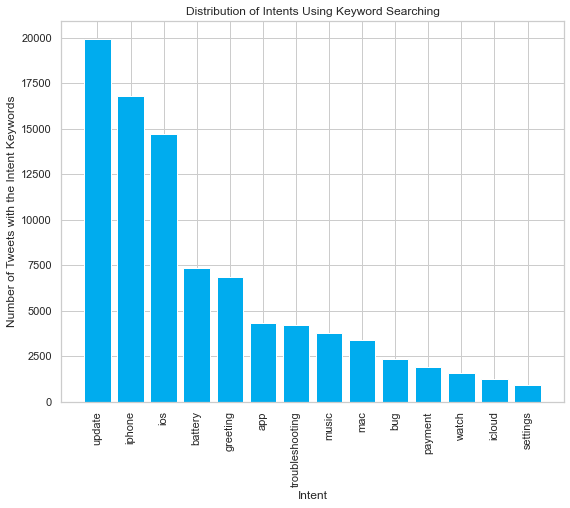

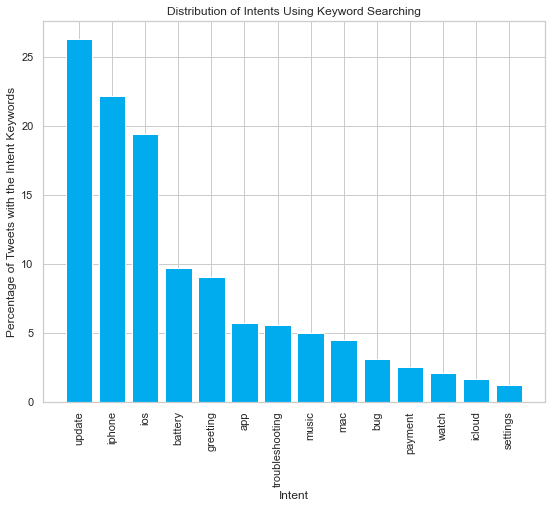

In [165]:
# Using the function above to visualize the distribution of intents in my dataset

intent_lengths = [len(get_key_tweets(processed_inbound, intents[intent])) for intent in intents.keys()]
keyword = pd.DataFrame({'intents': list(intents.keys()), 'intent_lengths': intent_lengths}).sort_values('intent_lengths', ascending = False)

# Visualization
plt.figure(figsize=(9,7))
plt.bar(keyword['intents'], keyword['intent_lengths'], color = '#00acee')
plt.title('Distribution of Intents Using Keyword Searching')
plt.xlabel('Intent')
plt.xticks(rotation=90)
plt.ylabel('Number of Tweets with the Intent Keywords')
plt.show()

# Proportions visualization
plt.figure(figsize=(9,7))
plt.bar(keyword['intents'], keyword['intent_lengths'] * 100 / 75879, color = '#00acee')
plt.title('Distribution of Intents Using Keyword Searching')
plt.xlabel('Intent')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Tweets with the Intent Keywords')
# Saving
plt.savefig('visualizations/intent_distribution_keyword.png')
plt.show()

We can see that based on the absolute value of the number of Tweets that are similar, we won't really have much trouble finding 1000 training examples for each intent category - especially for update! It might be a good idea as well to break down the higher occurances to more nuanced and distinct categories. Also, I generally want to use intents that have over 1000 Tweets, and the good news is that most of the intents have more than 1000 Tweets each.

In [166]:
keyword

,intents,intent_lengths
8,update,19922
2,iphone,16788
4,ios,14706
5,battery,7339
0,greeting,6843
1,app,4352
9,troubleshooting,4238
11,music,3779
7,mac,3367
13,bug,2331


Settings might not be the best intent to try on.

In [151]:
# Inspecting the Tweets with that specific keyword
len(get_key_tweets(processed_inbound, intents['greeting'])), 27373/75879

(6843, 0.36074539727724403)

In [152]:
get_key_tweets(processed_inbound, intents['app'])

[['hey',
  'anyone',
  'else',
  'upgraded',
  'io',
  'issue',
  'capital',
  'i️',
  'mail',
  'app',
  'put'],
 ['app', 'still', 'longer', 'able', 'control', 'lockscreen'],
 ['iphone',
  'yes',
  'io',
  'checked',
  'update',
  'none',
  'available',
  'swipe',
  'close',
  'app',
  'several',
  'time',
  'restart'],
 ['phone', 'app', 'work', 'thank', 'update', 'iphone', 'ipod'],
 ['bug', 'calendar', 'app', 'fix', 'upgraded', 'io', 'still', 'crash', 'io'],
 ['i',
  'have',
  'also',
  'force',
  'app',
  'close',
  'background',
  'reopen',
  'dice'],
 ['wife',
  'make',
  'mistake',
  'update',
  'revert',
  'back',
  'password',
  'keeper',
  'app',
  'dead',
  'can',
  'not',
  'access',
  'password'],
 ['io',
  'never',
  'release',
  'many',
  'bug',
  'statusbar',
  'randomly',
  'disappears',
  'facebook',
  'app'],
 ['attempt',
  'open',
  'twitter',
  'app',
  'complain',
  'io',
  'mess',
  'iphone',
  'slow',
  'life'],
 ['happens', 'close', 'whatsapp', 'happen', 'app', 

Note that the total number is 75879. 27373 of these are questions, or 36.1%.

I also want to see how many Tweets overlap between different categories that was searched. If there is too much overlap between the intents, it means that we can label two intents for that particular Tweet. I think that would still work, although that would mean that we would need to see how we can reply to double intents.

### Combination Exploration

In [153]:
# Returning a list of the combinations
list(itertools.combinations(list(intents.keys()),2))

[('greeting', 'app'),
 ('greeting', 'iphone'),
 ('greeting', 'icloud'),
 ('greeting', 'ios'),
 ('greeting', 'battery'),
 ('greeting', 'watch'),
 ('greeting', 'mac'),
 ('greeting', 'update'),
 ('greeting', 'troubleshooting'),
 ('greeting', 'settings'),
 ('greeting', 'music'),
 ('greeting', 'payment'),
 ('greeting', 'bug'),
 ('app', 'iphone'),
 ('app', 'icloud'),
 ('app', 'ios'),
 ('app', 'battery'),
 ('app', 'watch'),
 ('app', 'mac'),
 ('app', 'update'),
 ('app', 'troubleshooting'),
 ('app', 'settings'),
 ('app', 'music'),
 ('app', 'payment'),
 ('app', 'bug'),
 ('iphone', 'icloud'),
 ('iphone', 'ios'),
 ('iphone', 'battery'),
 ('iphone', 'watch'),
 ('iphone', 'mac'),
 ('iphone', 'update'),
 ('iphone', 'troubleshooting'),
 ('iphone', 'settings'),
 ('iphone', 'music'),
 ('iphone', 'payment'),
 ('iphone', 'bug'),
 ('icloud', 'ios'),
 ('icloud', 'battery'),
 ('icloud', 'watch'),
 ('icloud', 'mac'),
 ('icloud', 'update'),
 ('icloud', 'troubleshooting'),
 ('icloud', 'settings'),
 ('icloud', '

In [154]:
# Intent Tweets have all the keys, and as the value contains all the tweets that contain that key, as a set
intent_tweets = {}
for key in intents.keys():
    intent_tweets[key] = to_set(get_key_tweets(processed_inbound,intents[key]))

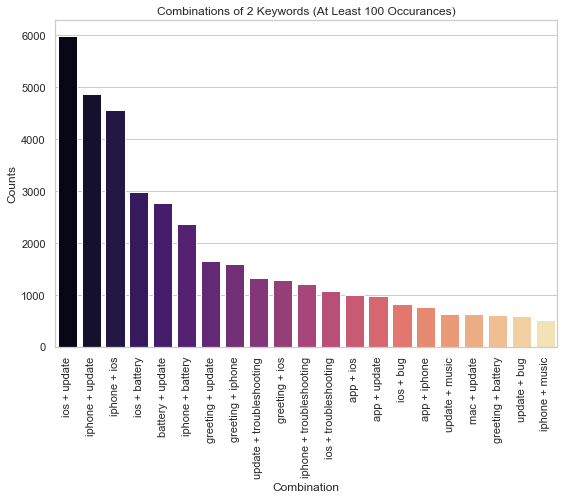

In [155]:
# Iterating through all pairs, and getting how many Tweets intersect between the pair
keyword_overlaps = {}

# Each i returns a tuple containing a pair of length r, which in this case is 2
for i in list(itertools.combinations(list(intents.keys()),2)):
    a = to_set(intent_tweets[i[0]])
    b = to_set(intent_tweets[i[1]])
    # Inserting pair to dictionary
    keyword_overlaps[f"{i[0]} + {i[1]}"] = len(a.intersection(b))

# Filtering to just the significant ones, which I define as greater than 100
combs = []
counts = []
for i in keyword_overlaps.items():
    if i[1] > 500:
        combs.append(i[0])
        counts.append(i[1])

# Visualizing as well
v = pd.DataFrame({'Combination': combs, "Counts": counts}).sort_values('Counts', ascending = False)
plt.figure(figsize=(9,6))
sns.barplot(x = v['Combination'], y = v['Counts'], palette = 'magma')
plt.title('Combinations of 2 Keywords (At Least 500 Occurances)')
plt.xticks(rotation=90)
plt.show()

It also technically hit me that we could have pairs of three intent keywords in a Twitter page. Let's do a quick EDA on that.

In [156]:
intents

{'greeting': ['hi', 'hello', 'hey', 'yo'],
 'app': ['app', 'application'],
 'iphone': ['iphone', 'i phone'],
 'icloud': ['icloud', 'i cloud'],
 'ios': ['io'],
 'battery': ['battery'],
 'watch': ['tv', 'show'],
 'mac': ['mac', 'macbook', 'laptop', 'computer'],
 'update': ['update'],
 'troubleshooting': ['problem', 'trouble', 'error'],
 'settings': ['settings', 'setting'],
 'music': ['music', 'song', 'playlist'],
 'payment': ['credit', 'card', 'payment', 'pay'],
 'bug': ['bug']}

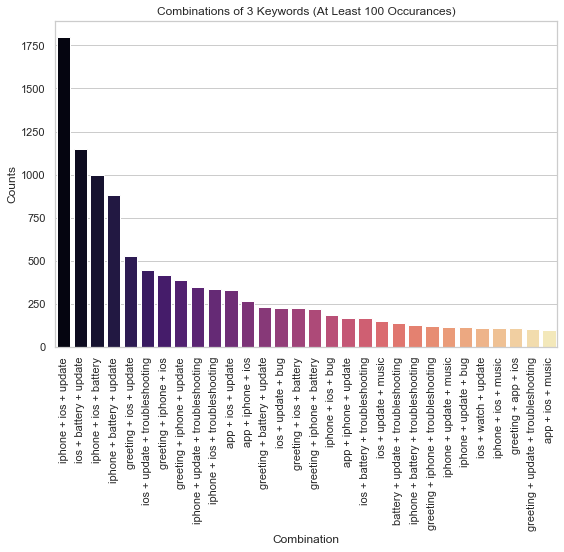

In [157]:
# GROUPS OF 3
keyword_overlaps = {}

# Each i returns a tuple containing a pair of length r, which in this case is 3
for i in list(itertools.combinations(list(intents.keys()),3)):
    a = to_set(intent_tweets[i[0]])
    b = to_set(intent_tweets[i[1]])
    c = to_set(intent_tweets[i[2]])
    # Inserting pair to dictionary
    keyword_overlaps[f"{i[0]} + {i[1]} + {i[2]}"] = len(a.intersection(b).intersection(c))
        
# Filtering to just the significant ones, which I define as greater than 100
combs = []
counts = []
for i in keyword_overlaps.items():
    if i[1] > 100:
        combs.append(i[0])
        counts.append(i[1])

# Visualizing as well
v = pd.DataFrame({'Combination': combs, "Counts": counts}).sort_values('Counts', ascending = False)
plt.figure(figsize=(9,6))
sns.barplot(x = v['Combination'], y = v['Counts'], palette = 'magma')
plt.title('Combinations of 3 Keywords (At Least 100 Occurances)')
plt.xticks(rotation=90)
plt.show()

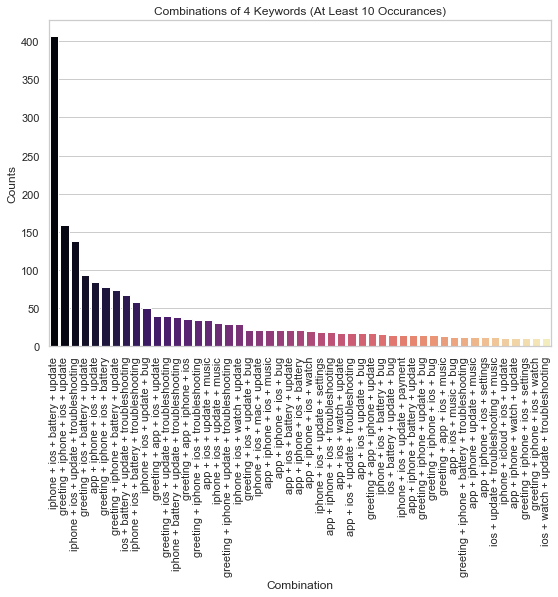

In [158]:
# GROUPS OF 4
keyword_overlaps = {}

# Each i returns a tuple containing a pair of length r, which in this case is 4
for i in list(itertools.combinations(list(intents.keys()),4)):
    a = to_set(intent_tweets[i[0]])
    b = to_set(intent_tweets[i[1]])
    c = to_set(intent_tweets[i[2]])
    d = to_set(intent_tweets[i[3]])
    # Inserting pair to dictionary
    keyword_overlaps[f"{i[0]} + {i[1]} + {i[2]} + {i[3]}"] = len(a.intersection(b).intersection(c).intersection(d))

# Filtering to just the significant ones, which I define as greater than 10
combs = []
counts = []
for i in keyword_overlaps.items():
    if i[1] > 10:
        combs.append(i[0])
        counts.append(i[1])

# Visualizing as well
v = pd.DataFrame({'Combination': combs, "Counts": counts}).sort_values('Counts', ascending = False)
plt.figure(figsize=(9,6))
sns.barplot(x = v['Combination'], y = v['Counts'], palette = 'magma')
plt.title('Combinations of 4 Keywords (At Least 10 Occurances)')
plt.xticks(rotation=90)
plt.show()

We see here in the combinations of 4 that it's really obvious what the customer want's to ask us. The highest one that occured 407 times is ('iphone recs + ios + battery + update') - this are the customers that want a recommendation for their iPhone about their ios, and it's something about an update.

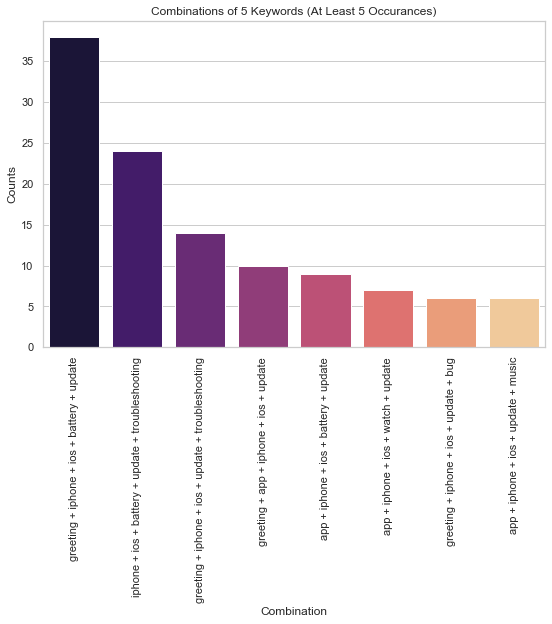

In [159]:
# GROUPS OF 5
keyword_overlaps = {}

# Each i returns a tuple containing a pair of length r, which in this case is 5
for i in list(itertools.combinations(list(intents.keys()),5)):
    a = to_set(intent_tweets[i[0]])
    b = to_set(intent_tweets[i[1]])
    c = to_set(intent_tweets[i[2]])
    d = to_set(intent_tweets[i[3]])
    e = to_set(intent_tweets[i[4]])
    # Inserting pair to dictionary
    keyword_overlaps[f"{i[0]} + {i[1]} + {i[2]} + {i[3]} + {i[4]}"] = len(a.intersection(b).intersection(c).intersection(d).intersection(e))

# Filtering to just the significant ones, which I define as greater than 5
combs = []
counts = []
for i in keyword_overlaps.items():
    if i[1] > 5:
        combs.append(i[0])
        counts.append(i[1])

# Visualizing as well
v = pd.DataFrame({'Combination': combs, "Counts": counts}).sort_values('Counts', ascending = False)
plt.figure(figsize=(9,6))
sns.barplot(x = v['Combination'], y = v['Counts'], palette = 'magma')
plt.title('Combinations of 5 Keywords (At Least 5 Occurances)')
plt.xticks(rotation=90)
plt.show()

Here even see some for combinations of 5.

Where better than to see what intents are available other than Apple's own [@applesupport](https://twitter.com/AppleSupport) Twitter page?

* We see that update is generally present across many combinations
* Most of the intents are usually a combination of one other one!

In [160]:
intents['greeting']

['hi', 'hello', 'hey', 'yo']

In [161]:
processed_inbound.iloc[0:10]

0     [new, update, i️, make, sure, download, yester...
4     [hey, anyone, else, upgraded, io, issue, capit...
9     [hello, internet, someone, explain, symbol, ke...
10    [get, screenshot, say, iphonex, reserve, email...
12    [thank, update, phone, even, slow, barely, wor...
14    [need, software, update, urgently, battery, la...
15         [hi, go, youtube, lose, do, thanks, support]
17    [hey, last, time, download, update, freak, pho...
19      [app, still, longer, able, control, lockscreen]
21           [need, something, battery, life, suck, as]
dtype: object

## Captured intents

1. Greeting
2. App recommendations
    * Need to tag the actual appication we want
    * Need to tag the problem
3. Hardware recommendations
    * Phone hardware issue
    * Battery health
6. ICloud photos
7. Apple watch
8. Software (iOS)/ update bugs
9. Statement (not really asking for anything, it is just giving a statement about something) - If possible, I would like to remove these because they are not really that useful to me.
    * Opinions
    * Complaint
    * Thinking about this point further, it might be useful to include question marks in the data because that encodes useful information about whether or not a customer is making a question or not.
10. Want to purchase
11. Gratitude/Closing

I will use doc2vec, with the similarity scores that it found to remove statements where I can.